In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

import random
import pickle as pkl

from math import floor
import torch

import pandas as pd
import seaborn as sns

from glob import glob

In [2]:
# give the training output files
# likely ../artifacts/tetris/training/training/OUTDIR/*.pkl
# or ..../OUTDIR/logs/*.pkl if the bottom line of the train_models(_keras) files are uncommented which place files there
logs = glob('../artifacts/tetris/training/neurips_training2/logs/*.pkl')

results = {}
for log_name in logs:
    with open(log_name, 'rb') as file:
        log = pkl.load(file)
    for key, val in log['training_records'].items():
#         print(key, val.keys())
        results[key] = {}
        for model in val.keys():
            results[key][model] = val[model]['avg_test_acc']

In [3]:
# if you have one combined file, otherwise comment and use the above
with open('../artifacts/tetris/training/snr_discovery/tetris_data_training_records-2023-05-28-12-30-15.pkl', 'rb') as file:
    results = pkl.load(file) 

In [4]:
results['training_records'].keys()

dict_keys(['multiplicative_8d8p_0.1_correlated', 'multiplicative_8d8p_0.6_correlated', 'multiplicative_8d8p_0.7_correlated', 'multiplicative_8d8p_0.4_imagenet', 'multiplicative_8d8p_0.3_imagenet', 'multiplicative_8d8p_0.3_uncorrelated', 'multiplicative_8d8p_0.5_imagenet', 'multiplicative_8d8p_0.2_correlated', 'multiplicative_8d8p_0.8_correlated', 'multiplicative_8d8p_0.3_correlated', 'multiplicative_8d8p_0.7_uncorrelated', 'multiplicative_8d8p_0.9_imagenet', 'multiplicative_8d8p_0.9_uncorrelated', 'multiplicative_8d8p_0.5_correlated', 'multiplicative_8d8p_0.2_uncorrelated', 'multiplicative_8d8p_0.6_imagenet', 'multiplicative_8d8p_0.95_imagenet', 'multiplicative_8d8p_0.5_uncorrelated', 'multiplicative_8d8p_0.05_correlated', 'multiplicative_8d8p_0.2_imagenet', 'multiplicative_8d8p_0.1_imagenet', 'multiplicative_8d8p_0.7_imagenet', 'multiplicative_8d8p_0.6_uncorrelated', 'multiplicative_8d8p_0.4_uncorrelated', 'multiplicative_8d8p_0.1_uncorrelated', 'multiplicative_8d8p_0.05_imagenet', 'm

In [5]:
# LLR_dict = {}
# MLP_dict = {}
# CNN_dict = {}

test_dict = {'LLR': {}, 'MLP': {}, 'CNN': {}}
val_dict = {'LLR': {}, 'MLP': {}, 'CNN': {}}

scen_names = {'Linear': 'LIN', 'Multiplicative': 'MULT', 'Translations_Rotations': 'RIGID', 'XOR': 'XOR'}

for key,scen_accs in results['training_records'].items():
    split_key = key.split('_')
    for scen_name in list(scen_names.keys()):
        if split_key[0] in scen_name.lower():
            key_name = scen_names[scen_name]
        elif split_key[1] in scen_name.lower():
            key_name = scen_names[scen_name]
            
    for key_ind in split_key:
        try:
            snr = round(float(key_ind),4)
        except:
            continue
    
    if 'uncorrelated' in split_key[-1]:
        bg = 'WHITE'
    elif 'correlated' == split_key[-1]:
        bg = 'CORR'
    else:
        bg = 'ImNet'

    for model_key, model_acc in scen_accs.items():
        if snr not in val_dict[model_key.split('_')[0]].keys():
            val_dict[model_key.split('_')[0]][snr] = {f'{key_name} {bg}': model_acc['avg_acc']*100}
        else:
            val_dict[model_key.split('_')[0]][snr][f'{key_name} {bg}'] = model_acc['avg_acc']*100
            
        if snr not in test_dict[model_key.split('_')[0]].keys():
            test_dict[model_key.split('_')[0]][snr] = {f'{key_name} {bg}': model_acc['avg_test_acc']*100}
        else:
            test_dict[model_key.split('_')[0]][snr][f'{key_name} {bg}'] = model_acc['avg_test_acc']*100

In [6]:
test_dfs = []
for model, dct in test_dict.items():
    test_dfs.append(pd.DataFrame(dct))
    
val_dfs = []
for model, dct in val_dict.items():
    val_dfs.append(pd.DataFrame(dct))

In [7]:
test_dfs[2]

,0.10,0.60,0.70,0.40,0.30,0.50,0.20,0.80,0.90,0.95,0.05
MULT CORR,99.959999,100.000000,99.99,100.000000,100.000000,99.990000,99.990000,100.000000,100.000000,100.00,99.509999
MULT ImNet,64.259999,99.080000,99.52,96.199999,90.890000,98.030000,81.659999,99.770001,99.959999,99.94,53.360000
MULT WHITE,90.999999,100.000000,100.00,100.000000,100.000000,100.000000,99.680001,100.000000,100.000000,100.00,73.789999
LIN ImNet,95.089999,100.000000,100.00,100.000000,99.929998,100.000000,99.610000,100.000000,100.000000,100.00,82.190000
LIN WHITE,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,98.480000
LIN CORR,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00,100.000000
XOR CORR,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,95.170000,100.00,89.610000
XOR WHITE,99.980000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000,94.830000,100.00,77.290000
XOR ImNet,71.999999,99.990000,100.00,99.820000,99.600000,99.909999,97.190000,100.000000,100.000000,100.00,50.500000
RIGID WHITE,55.159999,100.000000,100.00,99.990000,99.909999,100.000000,88.639998,100.000000,100.000000,100.00,50.500000


In [8]:
reindex_rows = [
    'LIN WHITE', 'LIN CORR', 'LIN ImNet',
    'MULT WHITE', 'MULT CORR', 'MULT ImNet',   
    'RIGID WHITE', 'RIGID CORR', 'RIGID ImNet',
    'XOR WHITE', 'XOR CORR', 'XOR ImNet'
]

<IPython.core.display.Javascript object>


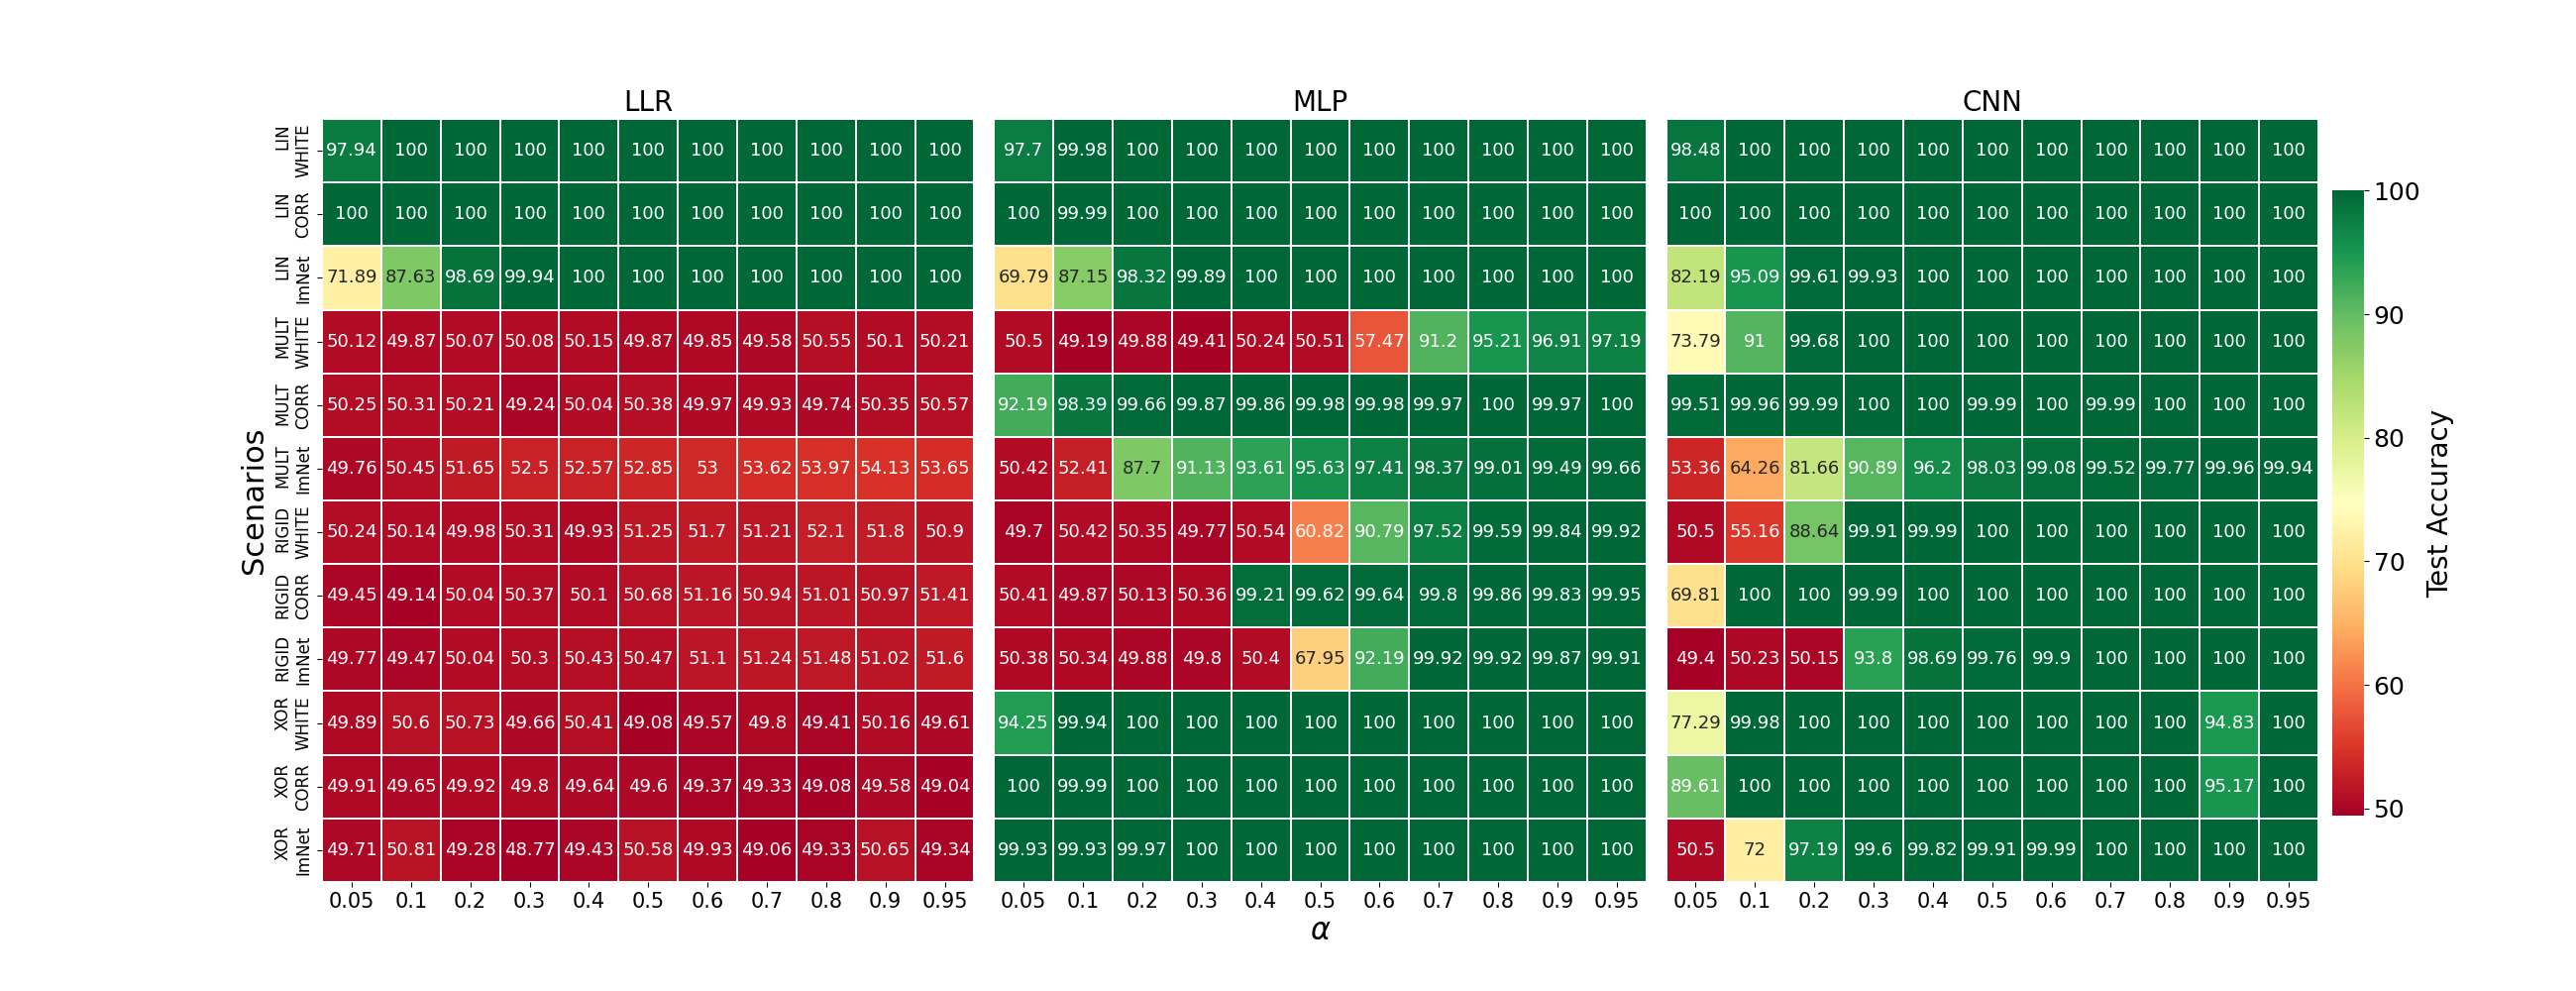

C:\Users\clark01\.virtualenvs\xai-synthetic-lesion-benchmark-5XZ-sXsh\lib\site-packages\ipykernel_launcher.py:20: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.


In [9]:
fig, ax = plt.subplots(1,3,figsize=(26,10), constrained_layout=True)
sheets = ['llr','mlp','cnn']

# yticklabels=[x.replace(' ', '\n') for x in snrs_dict['LLR'][0.025].keys()]

for i, dfx in enumerate(test_dfs):
#     df = df[[0.025,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]].reindex(reindex_rows)
    df = test_dfs[i][[0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95]].reindex(reindex_rows)
#     print(df)
    if i < 2:
        g=sns.heatmap(df, annot=True, annot_kws={"size": 45 / np.sqrt(len(df))}, fmt='g', cmap='RdYlGn', cbar=False, ax=ax[i], yticklabels=[x.replace(' ', '\n') for x in reindex_rows], linewidths=0.05)
    else:
        g=sns.heatmap(df, annot=True, annot_kws={"size": 45 / np.sqrt(len(df))}, fmt='g', cmap='RdYlGn', ax=ax[i], linewidths=0.05, cbar_kws = dict(use_gridspec=False,location="right", anchor=(-10.0,0.475), fraction=0.0385, pad=-0.3, label='Test Accuracy'))
#         ax[2].cax.set_position([.15, .2, .03, .45])
    ax[i].set_title(sheets[i].upper(), fontsize=20)
    
    g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 15)


plt.subplots_adjust(wspace=0.03) 
ax[1].set_yticklabels('')
ax[1].tick_params(left=False)
ax[2].set_yticklabels('')
ax[2].tick_params(left=False)

# print(ax[0].get_yticklabels())
ax[0].set_yticklabels(labels=ax[0].get_yticklabels(), fontsize=12, va='center', rotation=90)

ax[1].set_xlabel('$\\alpha$', fontsize=22)
ax[0].set_ylabel('Scenarios', fontsize=22)

ax[2].figure.axes[-1].yaxis.label.set_size(20)
ax[2].figure.axes[-1].tick_params(labelsize=18)

plt.xticks(rotation=0)
# plt.yticks(rotation=90)

# fig.suptitle('Avg Test accuracy over 10 runs (%)', fontsize=20, x=0.55, y=0.95)
plt.savefig('./figures/performance_table_test.png', bbox_inches='tight', dpi=300)